###I have tried to avoid using Libraries as much as I could (Computed F1 score etc. by running loops instead of using libraries)



# Data Exploration

##Loading Data and Initial Feature Analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
%matplotlib inline

In [2]:
!wget -O train.csv https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/train.csv

--2021-06-15 10:04:36--  https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16722 (16K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  16.33K  --.-KB/s    in 0s      

2021-06-15 10:04:37 (103 MB/s) - ‘train.csv’ saved [16722/16722]



In [3]:
train=pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
615,616,1,2,female,24.0,1,2,65.0000
616,617,0,3,male,34.0,1,1,14.4000
617,618,0,3,female,26.0,1,0,16.1000
618,619,1,2,female,4.0,2,1,39.0000


In [4]:
train.count()

PassengerId    620
Survived       620
Pclass         620
Sex            620
Age            489
SibSp          620
Parch          620
Fare           620
dtype: int64

We see that total Passengers are 620 and all columns except age have 0 non-null values. Age has 489 non-null and 131 null values.
Now we explore the data available to us to get an idea about factors that played a role in survival. 

##Catogerizing Features and deleting Rows with Null Values in Age 

Converting Sex in the data to numerical values; 0 for male, 1 for female

In [5]:
for i in range(len(train['Sex'])):
  if train['Sex'][i]=='male':
    train['Sex'][i]=0.0
  else:  train['Sex'][i]=1.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Dropping Rows with age as a NULL value, I attempte replacing age with median and with 0 but it gave lower accuracies on Test Data

In [6]:
train = train.dropna(axis = 0, how ='any')
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000,489.000000
mean,307.022495,0.415133,2.229039,29.781186,0.541922,0.441718,34.233929
std,177.586591,0.493250,0.837575,14.404998,0.953198,0.845176,48.211438
min,1.000000,0.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,152.000000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,308.000000,0.000000,2.000000,28.000000,0.000000,0.000000,16.100000
75%,457.000000,1.000000,3.000000,38.000000,1.000000,1.000000,33.500000
max,620.000000,1.000000,3.000000,71.000000,5.000000,5.000000,512.329200


##Creating catogeries for Fare and Age to plot them with ease for data exploration

In [7]:
print(np.mean(train['Fare']),np.median(train['Fare']),np.std(train['Fare']))
bins = [-100, 8.05, 16.1, 33.5, 513]
labels = [0.0, 1.0, 2.0, 3.0]
Fare_cat = pd.cut(train['Fare'], bins = bins, labels=labels)

Fare_cat.value_counts()

34.23392903885475 16.1 48.16211718935626


0.0    128
3.0    122
2.0    121
1.0    118
Name: Fare, dtype: int64

We have created an almost even distribution for Fare after catogerizing it

In [8]:
bins = [-1, 4, 18, 30, 50, 80]
labels = [0.0,1.0,2.0,3.0,4.0]
Age_cat = pd.cut(train['Age'], bins = bins, labels=labels)
Age_cat.value_counts()

2.0    193
3.0    162
1.0     62
4.0     44
0.0     28
Name: Age, dtype: int64

Age Distribution also catogerised, adults and young people max in number

## Calculation Of Percentage Of Survivors for each Feature:

I will plot bar graphs for Survival rate for each feature

In [9]:
X1=[1,2,3] 
Y1=[0,0,0] 

for i in [1,2,3]:
  Y1[i-1] = train['Survived'][train['Pclass']==i].mean()*100

X2=['male','female'] 
Y2=[0,0] 

for i in [0,1]:
  Y2[i] = train['Survived'][train['Sex']==i].mean()*100

X3=['0-4','4-18','18-30','30-50','>50'] 
Y3=[0,0,0,0,0] 

for i in [0,1,2,3,4]:
  Y3[i] = train['Survived'][Age_cat==i].mean()*100

X4=[0,1,2,3,4,5] 
Y4=[0,0,0,0,0,0] 

for i in [0,1,2,3,4,5]:                                                               # np.unique(train['SibSp']) gives-> array([0, 1, 2, 3, 4, 5])
  Y4[i] = train['Survived'][train['SibSp']==i].mean()*100

X5=[0,1,2,3,4,5] 
Y5=[0,0,0,0,0,0] 

for i in [0,1,2,3,4,5]:                                                               # np.unique(train['Parch']) gives-> array([0, 1, 2, 3, 4, 5])
  Y5[i] = train['Survived'][train['Parch']==i].mean()*100

X6=['Low','Below Median','Above Median','High'] 
Y6=[0,0,0,0] 

for i in [0,1,2,3]:
  Y6[i] = train['Survived'][Fare_cat==i].mean()*100



## Plotting Bar Graphs and Inference from Data Exploration: 

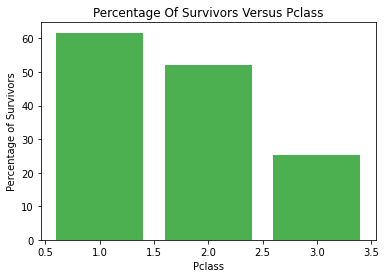

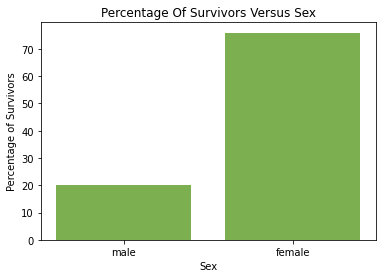

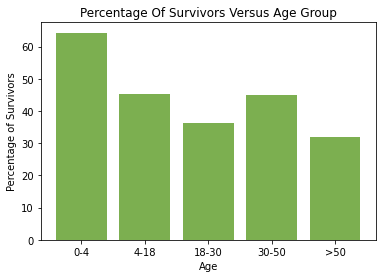

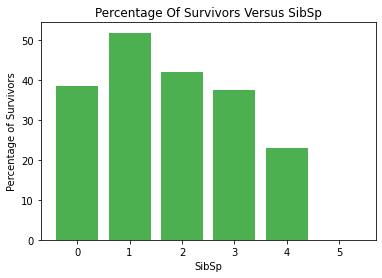

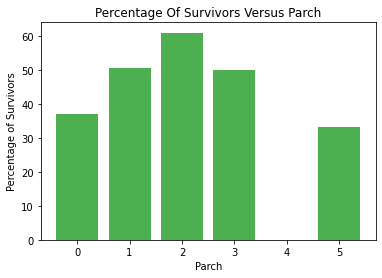

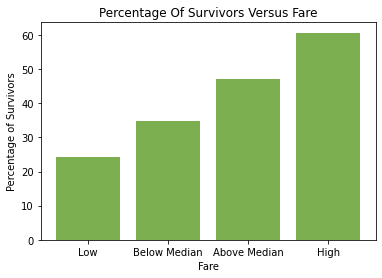

In [10]:
plt.bar(X1,Y1,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus Pclass") 
plt.xlabel("Pclass") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X2,Y2,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Sex") 
plt.xlabel("Sex") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X3,Y3,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Age Group") 
plt.xlabel("Age") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X4,Y4,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus SibSp") 
plt.xlabel("SibSp") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X5,Y5,color='#4CAF50') 
plt.title("Percentage Of Survivors Versus Parch") 
plt.xlabel("Parch") 
plt.ylabel("Percentage of Survivors") 
plt.show()

plt.bar(X6,Y6,color='#7CAF50') 
plt.title("Percentage Of Survivors Versus Fare") 
plt.xlabel("Fare") 
plt.ylabel("Percentage of Survivors") 
plt.show()

<p>Clearly, Female passengers have a much greater chance of survival, this might not be completely related to gender but other factors like the fact that women travelled mostly with families and in first class helped their survival. Nevertheless, this is a factor worth considering, we have already converted sex to numerical values to be used by the ML Model. The Age, SibSp and Parch also seem to show variation in Survival Rate.<p> Survival rate also goes up as Pclass improves; higher Fares also improves chance of survival, there is a strong possibility that these two are interrelated, i.e. Higher Fare is generally for Pclass=1. We find if this assumption is true using the plot below: 

## Heat Map using SeaBorn

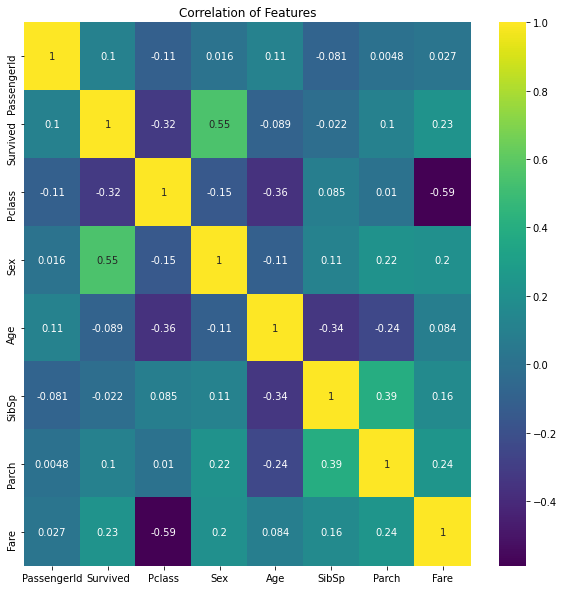

In [11]:
import seaborn as sns
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Correlation of Features')
sns.heatmap(train.astype(float).corr(),vmax=1.0, cmap=colormap, annot=True)

# Defining the Decision Tree

Gini impurity Function:

In [12]:
def get_gini_impurity(survived_count, total_count):
    survival_prob = survived_count/total_count
    not_survival_prob = (1 - survival_prob)
    gini_impurity = 1 - (survival_prob**2 + not_survival_prob**2)
    return gini_impurity

Initial Gini Index:

In [13]:
gini_start = get_gini_impurity((train['PassengerId'][train['Survived']==1]).count(),(train['PassengerId']).count())
gini_start

0.4855951589362707

Max Correlation shown by Sex and Pclass with Survived, hence one of these two should cause the first split.

In [14]:
train[['Sex', 'Survived']].groupby(['Sex']).agg(['count', 'sum'])

Survived     
       count  sum
Sex              
0.0      302   61
1.0      187  142

In [15]:
gini_male = get_gini_impurity(61,302)
gini_female = get_gini_impurity(142,187)
gini_male_weight = gini_male*302/489
gini_female_weight = gini_female*187/489
sex_gini_dec = gini_start - (gini_male_weight + gini_female_weight)
sex_gini_dec

0.14674063565744755

In [16]:
train[['Pclass', 'Survived']].groupby(['Pclass']).agg(['count', 'sum'])

Survived    
          count sum
Pclass             
1           128  79
2           121  63
3           240  61

In [17]:
gini_p1 = get_gini_impurity(79,128)
gini_p2 = get_gini_impurity(63,121)
gini_p3 = get_gini_impurity(61,240)
gini_p1_weight = gini_p1*128/489
gini_p2_weight = gini_p2*121/489
gini_p3_weight = gini_p3*240/489
Pclass_gini_dec = gini_start - (gini_p1_weight + gini_p2_weight + gini_p3_weight)
Pclass_gini_dec

0.052317580446408274

First split based on Sex as it has a better Gini impurity reduction


In [18]:
train[['Pclass', 'Survived','Sex']].groupby(['Sex','Pclass']).agg(['count', 'sum'])

Survived    
              count sum
Sex Pclass             
0.0 1            69  23
    2            65  11
    3           168  27
1.0 1            59  56
    2            56  52
    3            72  34

Now, deciding further tree nodes for Female side

In [19]:
gini_female =  get_gini_impurity(56+52+34,59+56+72)
gini_p1f = get_gini_impurity(56,59)
gini_p2f = get_gini_impurity(52,56)
gini_p3f = get_gini_impurity(34,72)
gini_p1f_weight = gini_p1f*59/(59+56+72)
gini_p2f_weight = gini_p2f*56/(59+56+72)
gini_p3f_weight = gini_p3f*72/(59+56+72)
Pclassf_gini_dec = gini_female - (gini_p1f_weight + gini_p2f_weight + gini_p3f_weight)
Pclassf_gini_dec

0.10336829100324701

Second split in female is by Pclass as it shows great correlation and good reduction in gini impurity

In [20]:
train[['Parch', 'Survived','Pclass']][train['Sex']==1.0].groupby(['Pclass','Parch']).agg(['count', 'sum'])

Survived    
                count sum
Pclass Parch             
1      0           40  39
       1            8   8
       2           11   9
2      0           33  30
       1           12  11
       2           10  10
       3            1   1
3      0           40  19
       1           13   7
       2           15   7
       4            2   0
       5            2   1

In [21]:
train[['SibSp', 'Survived','Pclass']][train['Sex']==1.0].groupby(['Pclass','SibSp']).agg(['count', 'sum'])

Survived    
                count sum
Pclass SibSp             
1      0           30  29
       1           25  23
       2            2   2
       3            2   2
2      0           33  31
       1           20  18
       2            3   3
3      0           37  20
       1           21   9
       2            5   2
       3            3   1
       4            5   2
       5            1   0

In [22]:
#For class 3
gini_p3f_ini = get_gini_impurity(20+9+2+1+2,37+21+5+3+5+1)
gini_p3f0 = get_gini_impurity(20,37)
gini_p3fn0 = get_gini_impurity(9+2+1+2,21+5+3+5+1)
gini_p3f0_weight = gini_p3f0*(37/(37+21+5+3+5+1))
gini_p3fn0_weight = gini_p3fn0*((21+5+3+5+1)/(37+21+5+3+5+1))

Pclassf_SibSp_gini_dec = gini_p3f_ini - (gini_p3f0_weight + gini_p3fn0_weight)
Pclassf_SibSp_gini_dec


0.009868201534868226

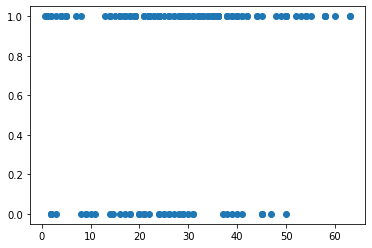

In [23]:
plt.scatter(train['Age'][train['Sex']==1.0],train['Survived'][train['Sex']==1.0])

Pclass 1 and 2 are almost pure for Female. For Pclass=3, we divide it according to SibSp<1 and >=1 as it is the only fair condition.

In [24]:
train[['SibSp', 'Survived','Pclass','Parch']][train['Sex']==1.0].groupby(['Pclass','SibSp','Parch']).agg(['count', 'sum'])

Survived    
                      count sum
Pclass SibSp Parch             
1      0     0           20  19
             1            5   5
             2            5   5
       1     0           19  19
             1            3   3
             2            3   1
       2     0            1   1
             2            1   1
       3     2            2   2
2      0     0           24  22
             1            4   4
             2            5   5
       1     0            9   8
             1            6   5
             2            5   5
       2     1            2   2
             3            1   1
3      0     0           26  14
             1            3   1
             2            7   5
             4            1   0
       1     0           12   4
             1            6   4
             4            1   0
             5            2   1
       2     0            1   0
             1            2   2
             2            2   0
       3     0            1   1
             1            2   0
       4     2            5   2
       5     2            1   0

We can improve Pclass 3 homogeneity by using Age>50 for Survival as an extra condition for SibSp=0 and use Parch=0,2 as a condition for SibSp>=1.

Now deciding the tree for male:

In [25]:
train[['Pclass', 'Survived']][train['Sex']==0.0].groupby(['Pclass']).agg(['count', 'sum'])

Survived    
          count sum
Pclass             
1            69  23
2            65  11
3           168  27

In [26]:
gini_male =  get_gini_impurity(23+11+27,168+65+69)
gini_p1m = get_gini_impurity(23,69)
gini_p2m = get_gini_impurity(11,65)
gini_p3m = get_gini_impurity(27,168)
gini_p1m_weight = gini_p1m*69/(168+65+69)
gini_p2m_weight = gini_p2m*65/(168+65+69)
gini_p3m_weight = gini_p3m*168/(168+65+69)
Pclassm_gini_dec = gini_male - (gini_p1m_weight + gini_p2m_weight + gini_p3m_weight)
Pclassm_gini_dec

0.010240389334507993

In [27]:
train[['Parch', 'Survived']][train['Sex']==0.0].groupby(['Parch']).agg(['count', 'sum'])

Survived    
         count sum
Parch             
0          242  44
1           38  10
2           18   7
3            1   0
4            2   0
5            1   0

In [28]:
gini_male =  get_gini_impurity(23+11+27,242+38+18+4)
gini_pa0m = get_gini_impurity(44,242)
gini_pan0m = get_gini_impurity(17,38+18+4)
gini_pa0m_weight = gini_pa0m*242/(242+38+18+4)
gini_pan0m_weight = gini_pan0m*(38+18+4)/(242+38+18+4)
Parchm_gini_dec = gini_male - (gini_pa0m_weight + gini_pan0m_weight)
Parchm_gini_dec

0.0032812888323610623

In [29]:
train[['SibSp', 'Survived']][train['Sex']==0.0].groupby(['SibSp']).agg(['count', 'sum'])

Survived    
         count sum
SibSp             
0          214  41
1           65  18
2            9   1
3            3   0
4            8   1
5            3   0

In [30]:
gini_male =  get_gini_impurity(23+11+27,214+65+9+8+6)
gini_s0m = get_gini_impurity(41,214)
gini_sn0m = get_gini_impurity(20,65+9+8+6)
gini_s0m_weight = gini_s0m*214/(214+65+9+8+6)
gini_sn0m_weight = gini_sn0m*(65+9+8+6)/(214+65+9+8+6)
Parchm_gini_dec = gini_male - (gini_s0m_weight + gini_sn0m_weight)
Parchm_gini_dec

0.0005258455588762478

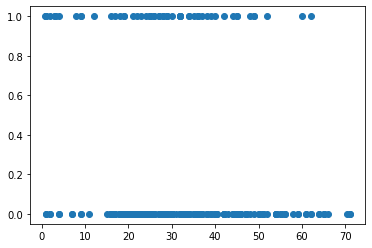

In [31]:
plt.scatter(train['Age'][train['Sex']==0.0],train['Survived'][train['Sex']==0.0])

Initial split for male on the basis of Pclass

In [32]:
train[['SibSp', 'Survived','Pclass']][train['Sex']==0.0].groupby(['Pclass','SibSp']).agg(['count', 'sum'])

Survived    
                count sum
Pclass SibSp             
1      0           47  14
       1           20   9
       2            1   0
       3            1   0
2      0           43   5
       1           19   5
       2            3   1
3      0          124  22
       1           26   4
       2            5   0
       3            2   0
       4            8   1
       5            3   0

In [33]:
train[['Parch', 'Survived','Pclass']][train['Sex']==0.0].groupby(['Pclass','Parch']).agg(['count', 'sum'])

Survived    
                count sum
Pclass Parch             
1      0           51  16
       1           11   3
       2            6   4
       4            1   0
2      0           54   5
       1            8   5
       2            3   1
3      0          137  23
       1           19   2
       2            9   2
       3            1   0
       4            1   0
       5            1   0

For Pclass = 2 we divide on the basis of Parch = 1. Pclass 1 on basis of SibSp=0 and SibSp=1 and Pclass 3 on basis of SibSp>0

In [34]:
train[['SibSp', 'Survived','Parch']][(train['Sex']==0.0) & (train['Pclass']==1)].groupby(['SibSp','Parch']).agg(['count', 'sum'])

Survived    
               count sum
SibSp Parch             
0     0           36  11
      1            8   1
      2            3   2
1     0           14   5
      1            3   2
      2            2   2
      4            1   0
2     0            1   0
3     2            1   0

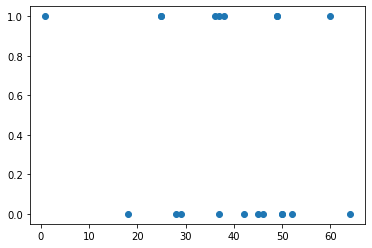

In [35]:
plt.scatter(train['Age'][(train['Sex']==0.0) & (train['Pclass']==1) & (train['SibSp']==1)],train['Survived'][(train['Sex']==0.0) & (train['Pclass']==1) & (train['SibSp']==1)])

SibSp=0, Parch=2 true, SibSp=1, Parch=1,2 true

In [36]:
train[['SibSp', 'Survived','Parch']][(train['Sex']==0.0) & (train['Pclass']==3)].groupby(['SibSp','Parch']).agg(['count', 'sum'])

Survived    
               count sum
SibSp Parch             
0     0          120  21
      1            2   0
      2            2   1
1     0           12   2
      1           10   2
      2            1   0
      3            1   0
      4            1   0
      5            1   0
2     0            5   0
3     1            1   0
      2            1   0
4     1            6   0
      2            2   1
5     2            3   0

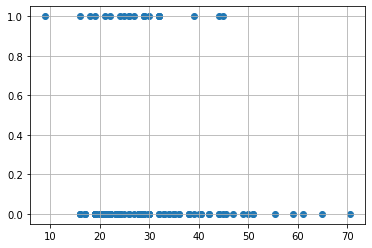

In [37]:
plt.scatter(train['Age'][(train['Sex']==0.0) & (train['Pclass']==3) & (train['SibSp']==0)],train['Survived'][(train['Sex']==0.0) & (train['Pclass']==3) & (train['SibSp']==0)])
plt.grid()

For age < 15  group is almost pure, so we eill use that for division for Pclass = 3 and SibSp = 0 

Final Tree becomes (Green is for Survived = 1 and Red for Survived = 0):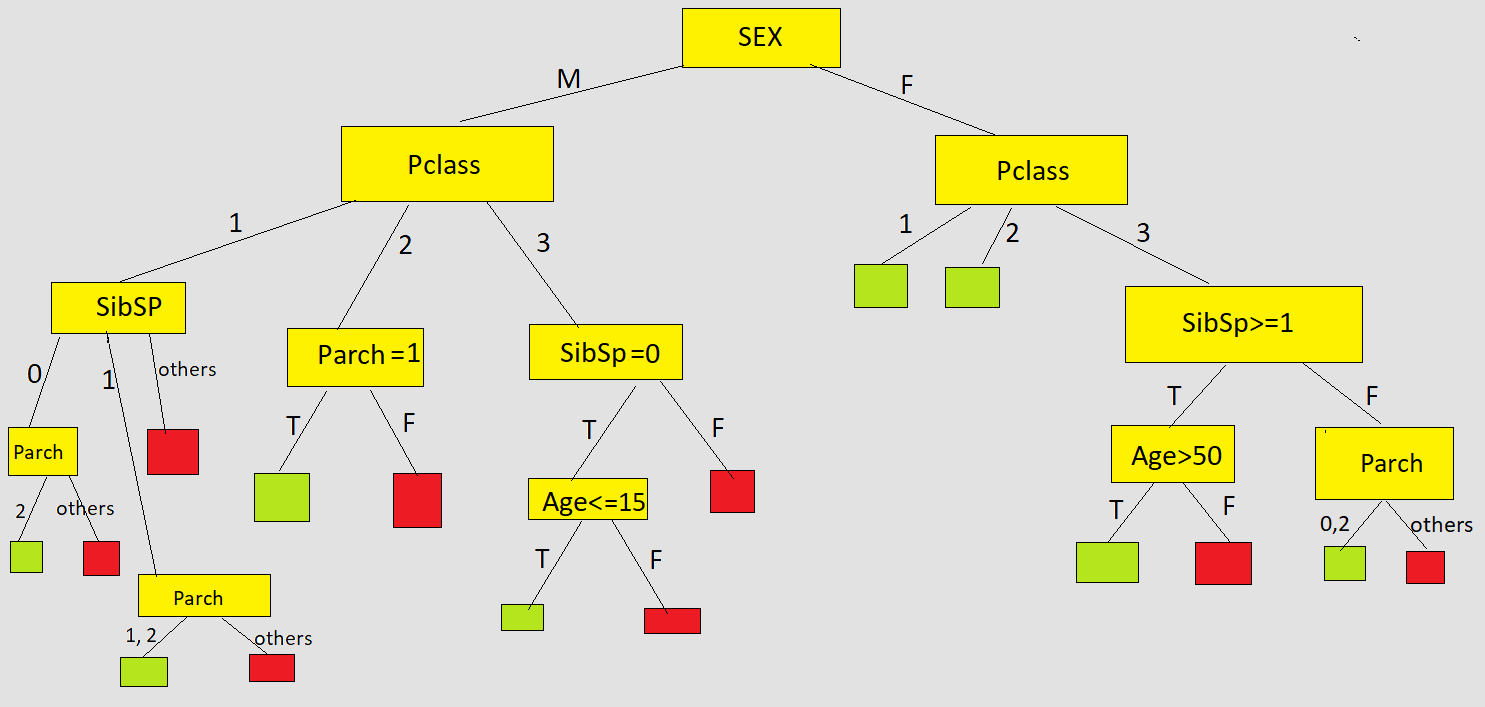

In [38]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.25


Defining Loss, Predictor (Desicion Tree) functions and the function that calculates deliverables.

In [39]:
def predictor(df):
  #index:Column = 1:PassengerId 2:Survives 3:Pclass 4:Sex 5:Age 6:SibSP 7:Parch 8:Fare
  orig_values=[]
  prediction = []

  for row in df.itertuples():
   orig_values.append(row[2])
   if (row[4]==0.0):                                     
     if (row[3]==1):
         if (row[6]==0):
           if (row[7]==2): prediction.append(1)
           else: prediction.append(0)
         elif (row[6]==1):
           if (row[7]==2 or row[7]==1): prediction.append(1)
           else: prediction.append(0) 
         else: prediction.append(0)  
     if (row[3]==2):
         if (row[7]==1): prediction.append(1)
         else : prediction.append(0)
     if (row[3]==3):
         if (row[6]==0):
           if (row[5]<=15): prediction.append(1)
           else: prediction.append(0)    
         else: prediction.append(0)         
   else:
     if (row[3]==3):
       if (row[6]==0):
         if (row[7]==0 or row[7]==2):
          prediction.append(1)
         else: prediction.append(0)
       else: 
         if (row[5]>50):prediction.append(1)
         else:  prediction.append(0)
     else :prediction.append(1)

  return orig_values, prediction 

def deliverable_cal(orig_values,prediction):
  true_pos = 0
  false_pos = 0
  true_neg = 0
  false_neg = 0

  for i in range(len(prediction)):
   if (prediction[i]==1 and orig_values[i]==1): true_pos+=1
   elif (prediction[i]==0 and orig_values[i]==1): false_neg+=1
   elif (prediction[i]==1 and orig_values[i]==0): false_pos+=1
   elif (prediction[i]==0 and orig_values[i]==0): true_neg+=1 

  precision = ((true_pos)/(true_pos+false_pos))
  recall = ((true_pos)/(true_pos+false_neg))

  acc = (true_pos+true_neg)/(true_pos+false_neg+true_neg+false_pos)
  F1_score = (2*precision*recall)/(precision+recall)
  loss = false_pos + false_neg
  return acc, loss, F1_score


##Decision Tree on Train Dataset 

Deliverables For train Dataset:

In [40]:
orig_values,prediction = predictor(train)
acc,loss,F1_score = deliverable_cal(orig_values, prediction)

print('For Train Data:','\nAccuracy =',acc*100,'%\nLoss =',loss,'\nF1 Score =',F1_score)

For Train Data: 
Accuracy = 81.59509202453987 %
Loss = 90 
F1 Score = 0.7554347826086958


## Test Dataset:

Loading Test dataset and processing it:

In [41]:
!wget -O test.csv https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/test.csv
test=pd.read_csv('test.csv')

for i in range(len(test['Sex'])):
  if test['Sex'][i]=='male':
    test['Sex'][i]=0.0
  else:  test['Sex'][i]=1.0

test = test.dropna(axis = 0, how ='any')
test.describe()  

--2021-06-15 10:04:40--  https://raw.githubusercontent.com/vanshbansal1505/ICG-Summer-Program-2021-DS/main/Assignment-2/data/test.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7385 (7.2K) [text/plain]
Saving to: ‘test.csv’

test.csv            100%[===================>]   7.21K  --.-KB/s    in 0s      

2021-06-15 10:04:40 (51.4 MB/s) - ‘test.csv’ saved [7385/7385]



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000,225.000000
mean,756.240000,0.386667,2.253333,29.520756,0.448889,0.408889,35.695519
std,78.680838,0.488072,0.841342,14.817980,0.875414,0.872144,62.037074
min,621.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,689.000000,0.000000,1.000000,20.000000,0.000000,0.000000,7.925000
50%,755.000000,0.000000,3.000000,28.000000,0.000000,0.000000,13.500000
75%,822.000000,1.000000,3.000000,39.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


Deliverables For test Dataset:

In [42]:
orig_values,prediction = predictor(test)
acc, loss, F1_score = deliverable_cal(orig_values, prediction)

print('For Test Data:','\nAccuracy =',acc*100,'%\nLoss =',loss,'\nF1 Score =',F1_score)

For Test Data: 
Accuracy = 78.66666666666666 %
Loss = 48 
F1 Score = 0.6923076923076923


#Final Statistics:

<p>For Training Data (489 Non-Null Cases): 

```
Accuracy = 81.59509202453987 %
Loss = 90 
F1 Score = 0.7554347826086958
```
<p><p>
For Test Data (225 Non-Null Cases): 

```
Accuracy = 78.66666666666666 %
Loss = 48 
F1 Score = 0.6923076923076923
```
<p>

#Citations:

<p>Links:<p>

https://www.kaggle.com/dmilla/introduction-to-decision-trees-titanic-dataset

https://www.youtube.com/watch?v=ZVR2Way4nwQ
